In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadesh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
data = pd.read_csv('dataset/amazon_alexa.tsv', delimiter='\t', quoting= 3)
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (3150, 5)


In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [14]:
print(f"Feature names: {data.columns.values}")

Feature names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [15]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [17]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [18]:
data.dropna(inplace=True)

In [19]:
print(f"Dataset Shape after droping null values: {data.shape}")

Dataset Shape after droping null values: (3149, 5)


In [22]:
data['length'] = data['verified_reviews'].apply(len)
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382


In [23]:
print(f"Data readings value count: {data['rating'].value_counts()}")

Data readings value count: rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


Text(0, 0.5, 'Count')

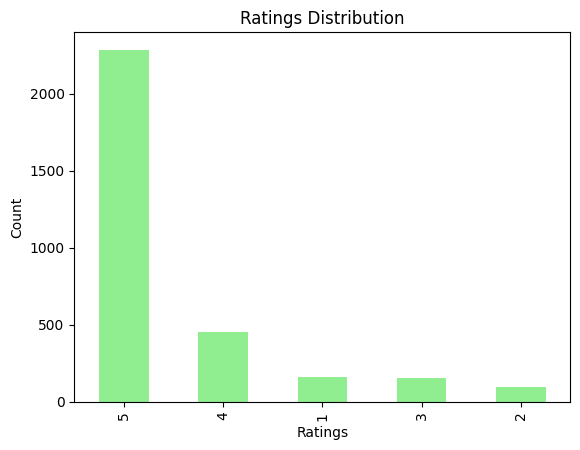

In [30]:
data['rating'].value_counts().plot.bar(color='lightgreen')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0.5, 1.0, 'variation based count')

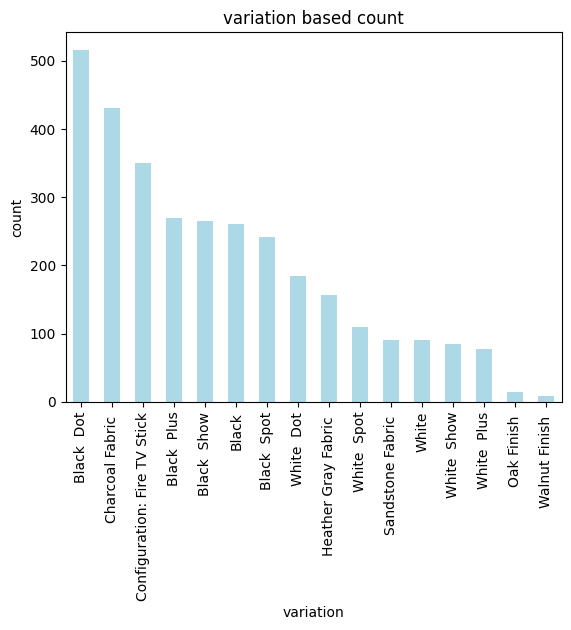

In [29]:
data['variation'].value_counts().plot.bar(color='lightblue')
plt.ylabel('count')
plt.title("variation based count")

In [31]:
print(f"Rating value count - Percentage: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - Percentage: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


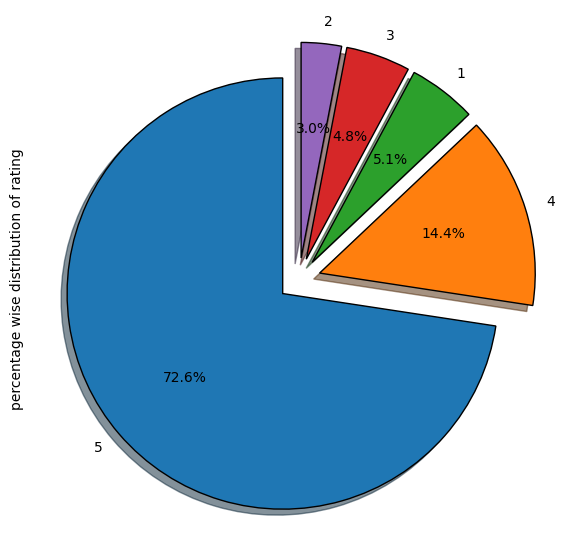

In [33]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'lightblue', 'orange', 'green', 'yellow')
wp = {'linewidth' : 1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow = True, color = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'percentage wise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')